# Airbnb data insight for Boston and Seattle area

## Business Understanding

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

Airbnb is currently a very popular platform for both guests and hosts to enjoy their customized travellings. There are many interesting things we can explore using the data from Airbnb insight. Let's get started by using the data of Boston and Seattle cities.

Three interesting questions come to my mind when looking into the data:

1. Is there any difference in price between Boston and Seattle area?
2. Can we predict price in Boston and Seattle Airbnb using this dataset?
3. What's the top important features when predicting the price in two cities?

## Load the data first:

In [1]:
import numpy as np
import pandas as pd

In [2]:
boston_listings = pd.read_csv('../data/boston/listings.csv')
seattle_listings = pd.read_csv('../data/seattle/listings.csv')

In [3]:
boston_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [4]:
seattle_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [5]:
boston_listings.shape

(3585, 95)

In [6]:
seattle_listings.shape

(3818, 92)

In [7]:
boston_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [8]:
seattle_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

## Visualize airbnb location in Boston and Seattle area

Dataset from both Boston and Seattle contains geographical information. Let's draw their geospatial distribution in map to take a look.

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
import mplleaflet

In [10]:
boston_samples = boston_listings.sample(100)
plt.scatter(boston_samples['longitude'], boston_samples['latitude'])
mplleaflet.display()

In [11]:
seattle_samples = seattle_listings.sample(100)
plt.scatter(seattle_samples['longitude'], seattle_samples['latitude'])
mplleaflet.display()

As our expectation, most rents locate at downtown area, where travellers can find more fun :)). Let's try to solve the three questions above then.

## Is there any difference in price and review?

In [12]:
boston_prices = pd.read_csv('../data/boston/calendar.csv').dropna(how = 'any', axis = 0)
seattle_prices = pd.read_csv('../data/seattle/calendar.csv').dropna(how = 'any', axis = 0)

In [13]:
seattle_prices.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [14]:
boston_prices['price'] = boston_prices['price'].apply(lambda x : float(x.replace('$', '').replace(',', '')))
seattle_prices['price'] = seattle_prices['price'].apply(lambda x : float(x.replace('$', '').replace(',', '')))

In [15]:
boston_prices['price'].describe()

count    643037.000000
mean        198.438909
std         180.142913
min          11.000000
25%          85.000000
50%         150.000000
75%         255.000000
max        7163.000000
Name: price, dtype: float64

In [16]:
seattle_prices['price'].describe()

count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

## Two distribution t-test with different variance assumption

$$H_0 : \bar{X_1}\ =\ \bar{X_2}  \\ H_1 : \bar{X_1}\ !=\ \bar{X_2}$$


$$t = \frac{\bar{X_1} - \bar{X_2}}{s}\enspace$$  satisfies t-distribution where 
$$\enspace s = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$$


Degree of freedom is equal to
$$
DF = \frac{(VAR_1 + VAR_2)^2}{\frac{VAR_1^2}{n_1 - 1} + \frac{VAR_2^2}{n_2 - 1}} 
$$

After testing, we find that the p-value is smaller than 0.001, which means that we should reject $H_0$ with a high confidence. And the average renting price between Boston and Seattle is very different.

In [52]:
s_2 = np.sqrt(seattle_prices['price'].std()**2 / seattle_prices['price'].shape[0] + \
              boston_prices['price'].std()**2 / boston_prices['price'].shape[0])

t = (seattle_prices['price'].mean() - boston_prices['price'].mean()) / s_2

In [53]:
t

-242.40846787381446

In [65]:
seattle_prices['price'].var()

11038.206657946257

In [66]:
DF = (seattle_prices['price'].var() + boston_prices['price'].var())**2 / \
     (seattle_prices['price'].var()**2 / (seattle_prices['price'].shape[0] - 1) + \
      boston_prices['price'].var()**2 / (boston_prices['price'].shape[0] - 1))
DF

1069725.0833099699

According to the t-test table, we find that the mean value for prices in Boston and Seattle is different. With p-value < 0.001

## Price value histogram for Boston and Seattle cities

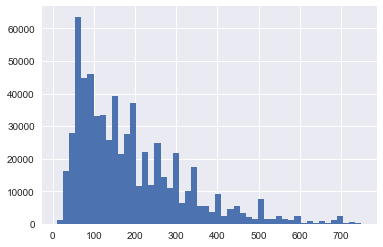

In [59]:
plt.hist(list(boston_prices[boston_prices['price'] < 5 * np.median(boston_prices['price'])]['price']), bins = 50)
#plt.hist(list(boston_prices[boston_prices['price'] < np.mean(boston_prices['price']) + \
#                                                     5 * np.std(boston_prices['price'])]['price']), bins = 50)
plt.show()

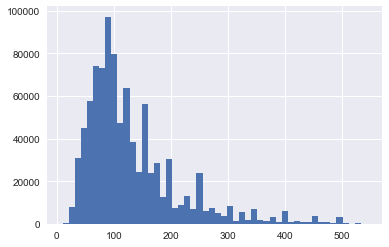

In [60]:
plt.hist(list(seattle_prices[seattle_prices['price'] < 5 * np.median(seattle_prices['price'])]['price']), bins = 50)
plt.show()

## Make prediction towards price in two cities

In [74]:
boston_prices = boston_prices.rename(columns = {'listing_id' : 'id'})
seattle_prices = seattle_prices.rename(columns = {'listing_id' : 'id'})


In [97]:
boston_df = pd.merge(boston_listings, boston_prices, on = 'id')
seattle_df = pd.merge(seattle_listings, seattle_prices, on = 'id')

In [100]:
boston_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [113]:
b_columns = [col for col in boston_df.columns if boston_df[col].dtype == 'float64' or boston_df[col].dtype == 'int64']
s_columns = [col for col in seattle_df.columns if seattle_df[col].dtype == 'float64' or seattle_df[col].dtype == 'int64']

In [115]:
boston_numeric = boston_df[b_columns]
seattle_numeric = seattle_df[s_columns]

### Drop features with all null value

In [127]:
seattle_numeric.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month', 'price_y'],
      dtype='object')

In [128]:
boston_numeric.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'guests_included', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'calculated_host_listings_count', 'reviews_per_month', 'price_y'],
      dtype='object')

In [132]:
boston_numeric = boston_numeric.drop(columns = boston_numeric.columns[boston_numeric.isnull().all()])
seattle_numeric = seattle_numeric.drop(columns = seattle_numeric.columns[seattle_numeric.isnull().all()])

In [137]:
boston_numeric.columns[boston_numeric.isnull().any()]

Index(['bathrooms', 'bedrooms', 'beds', 'square_feet', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [139]:
boston_numeric[boston_numeric['bathrooms'].isnull()]

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price_y
22141,777903,20160906204935,4102281,1,1,42.307574,-71.134630,2,NaN,1.0,...,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0.43,85.0
22142,777903,20160906204935,4102281,1,1,42.307574,-71.134630,2,NaN,1.0,...,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0.43,85.0
22143,777903,20160906204935,4102281,1,1,42.307574,-71.134630,2,NaN,1.0,...,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0.43,85.0
22144,777903,20160906204935,4102281,1,1,42.307574,-71.134630,2,NaN,1.0,...,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0.43,85.0
22145,777903,20160906204935,4102281,1,1,42.307574,-71.134630,2,NaN,1.0,...,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0.43,85.0
22146,777903,20160906204935,4102281,1,1,42.307574,-71.134630,2,NaN,1.0,...,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0.43,85.0
22147,777903,20160906204935,4102281,1,1,42.307574,-71.134630,2,NaN,1.0,...,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0.43,85.0
22148,777903,20160906204935,4102281,1,1,42.307574,-71.134630,2,NaN,1.0,...,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0.43,85.0
22149,777903,20160906204935,4102281,1,1,42.307574,-71.134630,2,NaN,1.0,...,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0.43,85.0
22150,777903,20160906204935,4102281,1,1,42.307574,-71.134630,2,NaN,1.0,...,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0.43,85.0


### fill na with median of columns

In [140]:
fill_median = lambda col : col.fillna(col.median())
boston_numeric = boston_numeric.apply(fill_median, axis = 0)
seattle_numeric = seattle_numeric.apply(fill_median, axis = 0)

In [143]:
boston_numeric.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'price_y'],
      dtype='object')

In [144]:
seattle_numeric.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'price_y'],
      dtype='object')

### Filter useless features

In [145]:
boston_numeric = boston_numeric.drop(columns=['id', 'scrape_id', 'host_id'])
seattle_numeric = seattle_numeric.drop(columns=['id', 'scrape_id', 'host_id'])

# price prediction with xgboost

In [155]:
from sklearn.model_selection import train_test_split
X_boston, y_boston = boston_numeric.loc[:,boston_numeric.columns != 'price_y'], boston_numeric['price_y']
X_seattle, y_seattle = seattle_numeric.loc[:,seattle_numeric.columns != 'price_y'], seattle_numeric['price_y']


In [184]:
def search_params(params, estimator, X, y, cv = 5):
    clf = GridSearchCV(estimator, params, cv = cv, scoring = 'neg_mean_squared_error', verbose = 2)
    clf.fit(X, y)
    return clf.best_params_

def cal_rmse(y_pred, y_true):
    return np.sqrt(np.sum((y_pred - y_true)**2 / len(y_pred)))
    

## Boston price prediction:

In [158]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston)
params = {'max_depth' : [3, 5],
          'learning_rate' : [0.05, 0.1],
          'n_estimators' : [100]}

xgb = XGBRegressor(booster='gbtree', n_jobs=2)
boston_opt_params = search_params(params, xgb, X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] learning_rate=0.05, n_estimators=100, max_depth=3 ...............
[CV]  learning_rate=0.05, n_estimators=100, max_depth=3, total=  23.1s
[CV] learning_rate=0.05, n_estimators=100, max_depth=3 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.8s remaining:    0.0s


[CV]  learning_rate=0.05, n_estimators=100, max_depth=3, total=  23.8s
[CV] learning_rate=0.05, n_estimators=100, max_depth=3 ...............
[CV]  learning_rate=0.05, n_estimators=100, max_depth=3, total=  26.1s
[CV] learning_rate=0.05, n_estimators=100, max_depth=3 ...............
[CV]  learning_rate=0.05, n_estimators=100, max_depth=3, total=  24.2s
[CV] learning_rate=0.05, n_estimators=100, max_depth=3 ...............
[CV]  learning_rate=0.05, n_estimators=100, max_depth=3, total=  22.6s
[CV] learning_rate=0.05, n_estimators=100, max_depth=5 ...............
[CV]  learning_rate=0.05, n_estimators=100, max_depth=5, total=  38.7s
[CV] learning_rate=0.05, n_estimators=100, max_depth=5 ...............
[CV]  learning_rate=0.05, n_estimators=100, max_depth=5, total=  38.5s
[CV] learning_rate=0.05, n_estimators=100, max_depth=5 ...............
[CV]  learning_rate=0.05, n_estimators=100, max_depth=5, total=  38.0s
[CV] learning_rate=0.05, n_estimators=100, max_depth=5 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 10.6min finished


In [203]:
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston)
boston_opt_params['n_estimators'] = 200
xgb_boston = XGBRegressor(booster='gbtree', **boston_opt_params)
xgb_boston.fit(X_train, y_train, eval_metric = 'rmse')
y_pred = xgb_boston.predict(X_test)

KeyboardInterrupt: 

In [ ]:
print(cal_rmse(y_pred, y_test))

In [ ]:
def visualize_pred(y_pred, y_test, city = 'Boston'):
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set(xlabel='Samples', ylabel='prices',
           title='Predicted and true price comparison for Airbnb in ' + city +' area(100 samples)')
    ax.plot(range(len(y_pred[:100])),y_pred[:100], color = 'blue')
    ax.plot(range(len(y_test[:100])),y_test[:100], color = 'red')
    ax.legend(('predicted price', 'true price'),
               loc='upper right')
    plt.show() 

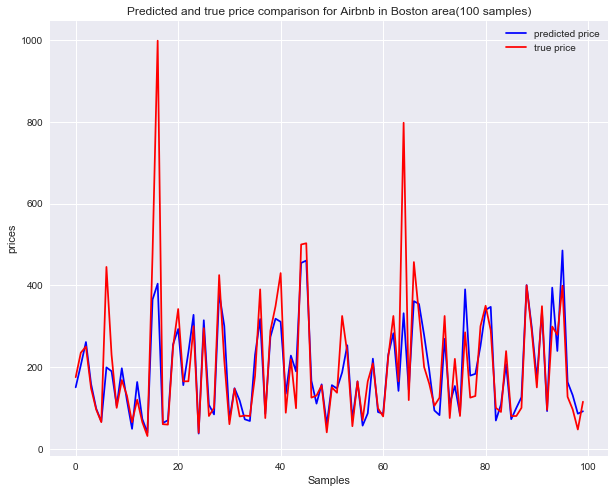

In [198]:
visualize_pred(y_pred, y_test)

## Seattle price prediction:

In [191]:
X_seattle, y_seattle = seattle_numeric.loc[:,seattle_numeric.columns != 'price_y'], seattle_numeric['price_y']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X_seattle, y_seattle)
params = {'max_depth' : [5],
          'learning_rate' : [0.1],
          'n_estimators' : [100, 200]}

xgb = XGBRegressor(booster='gbtree', n_jobs=2)
seattle_opt_params = search_params(params, xgb, X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] learning_rate=0.1, n_estimators=100, max_depth=5 ................
[CV] . learning_rate=0.1, n_estimators=100, max_depth=5, total=  54.0s
[CV] learning_rate=0.1, n_estimators=100, max_depth=5 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.7s remaining:    0.0s


[CV] . learning_rate=0.1, n_estimators=100, max_depth=5, total=  54.5s
[CV] learning_rate=0.1, n_estimators=100, max_depth=5 ................
[CV] . learning_rate=0.1, n_estimators=100, max_depth=5, total=  55.3s
[CV] learning_rate=0.1, n_estimators=100, max_depth=5 ................
[CV] . learning_rate=0.1, n_estimators=100, max_depth=5, total=  52.3s
[CV] learning_rate=0.1, n_estimators=100, max_depth=5 ................
[CV] . learning_rate=0.1, n_estimators=100, max_depth=5, total=  52.2s
[CV] learning_rate=0.1, n_estimators=200, max_depth=5 ................
[CV] . learning_rate=0.1, n_estimators=200, max_depth=5, total= 1.8min
[CV] learning_rate=0.1, n_estimators=200, max_depth=5 ................
[CV] . learning_rate=0.1, n_estimators=200, max_depth=5, total= 1.7min
[CV] learning_rate=0.1, n_estimators=200, max_depth=5 ................
[CV] . learning_rate=0.1, n_estimators=200, max_depth=5, total= 1.7min
[CV] learning_rate=0.1, n_estimators=200, max_depth=5 ................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 13.4min finished


In [200]:
xgb_seattle = XGBRegressor(booster='gbtree', **seattle_opt_params)
xgb_seattle.fit(X_train, y_train, eval_metric = 'rmse')
y_pred_seattle = xgb_seattle.predict(X_test)
print(cal_rmse(y_pred_seattle, y_test))

36.855132499376325


In [202]:
seattle_opt_params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

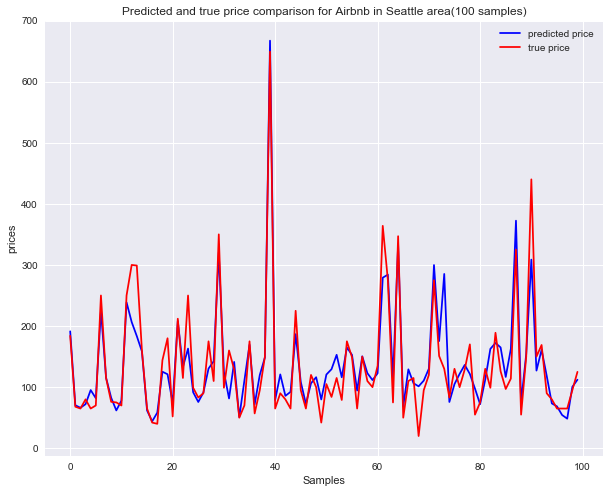

In [201]:
visualize_pred(y_pred_seattle, y_test, 'Seattle')

# Top important features for price prediction